# Introduction

## This dataset is acquired from Zillow. This dataset contains information about U.S. national wide home value from 2000-01-31 to 2021-09-30. In addition, this dataset also has information on all the states in the U.S. In this assignment, I used spark to load the dataset and did cleaning and EDA. The purpose is to understand how the home value changes in the past two decades.

# Analysis

pip install pyspark

In [73]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:
filePath = "/Users/Merlin/Downloads/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

In [53]:
spark = SparkSession.builder.getOrCreate()   

In [54]:
df = spark.read.csv(filePath)

In [55]:
df = pd.read_csv(filePath)

In [56]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30
0,102001,0,United States,Country,NaN,127569.0,127914.0,128277.0,129016.0,129762.0,...,269165.0,272132.0,275247.0,278593.0,282335.0,286913.0,292304.0,298069.0,303296.0,308220.0
1,394913,1,"New York, NY",Msa,NY,225438.0,226785.0,227997.0,230383.0,232604.0,...,514350.0,519193.0,523962.0,528241.0,532983.0,538439.0,545638.0,553551.0,561136.0,567059.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231209.0,232014.0,233247.0,235592.0,238105.0,...,736123.0,741232.0,748830.0,756443.0,767598.0,783132.0,803315.0,824025.0,837548.0,846526.0
3,394463,3,"Chicago, IL",Msa,IL,170602.0,171004.0,171525.0,172568.0,173673.0,...,257432.0,258905.0,261216.0,263319.0,266367.0,269105.0,272894.0,277086.0,281183.0,284285.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130189.0,130293.0,130379.0,130591.0,130813.0,...,274646.0,276926.0,280361.0,284368.0,289886.0,296250.0,303499.0,311268.0,319368.0,326597.0


In [57]:
#multiple datetime columns exist, melt date data into one column
newDf = pd.melt(df, id_vars = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"], var_name = "Date",
               value_name = "Value")

In [58]:
#remove null
newDf = newDf.dropna()

In [70]:
newDf

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Value
1,394913,1,"New York, NY",Msa,NY,2000-01-31,225438.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2000-01-31,231209.0
3,394463,3,"Chicago, IL",Msa,IL,2000-01-31,170602.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2000-01-31,130189.0
5,394974,5,"Philadelphia, PA",Msa,PA,2000-01-31,130108.0
...,...,...,...,...,...,...,...
237232,394841,916,"Maysville, KY",Msa,KY,2021-09-30,105735.0
237240,395142,925,"Sweetwater, TX",Msa,TX,2021-09-30,83259.0
237242,753929,927,"Zapata, TX",Msa,TX,2021-09-30,104489.0
237246,394968,931,"Pecos, TX",Msa,TX,2021-09-30,155713.0


In [64]:
#convert Date column from String to Datetime
newDf['Date'] = pd.to_datetime(newDf['Date'], format = '%Y/%m/%d')

# Average Home Value in the U.S by month.

In [65]:
average = newDf.groupby('Date')['Value'].mean().reset_index()

In [66]:
average

,Date,Value
0,2000-01-31,111139.660633
1,2000-02-29,111457.514673
2,2000-03-31,111692.488739
3,2000-04-30,112513.892377
4,2000-05-31,113343.991071
...,...,...
256,2021-05-31,215465.584989
257,2021-06-30,219490.900881
258,2021-07-31,223250.134509
259,2021-08-31,226827.622517


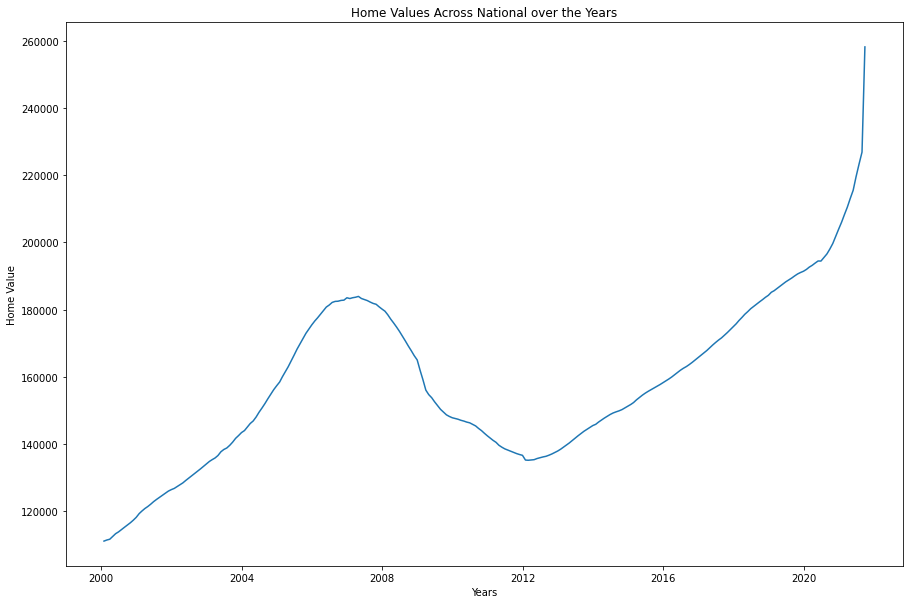

In [68]:
plt.figure(figsize=(15,10))
plt.plot('Date','Value', data = average)
plt.xlabel('Years')
plt.ylabel('Home Value')
plt.title('Home Values Across National over the Years')
plt.show()

# compare home value within each states

In [72]:
averageByStates = newDf.groupby(['Date','StateName'])['Value'].mean().reset_index()

In [79]:
sns.set(rc={'figure.figsize':(16,10)})

<AxesSubplot:xlabel='Date', ylabel='Value'>

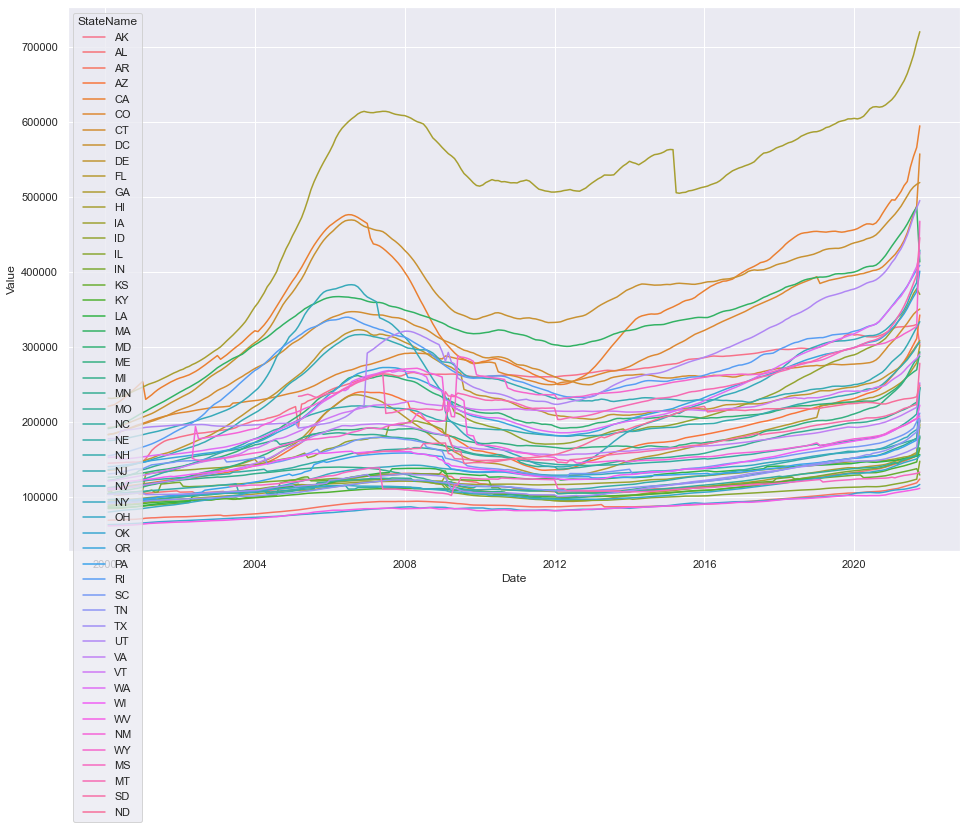

In [80]:
sns.lineplot(data=averageByStates, x="Date", y="Value", hue="StateName")

In [143]:
#select top three and bottom three based on overall sum of the home value
stateSum = newDf.groupby(['StateName'])['Value'].agg(SumValue=('Value', sum)).reset_index()

In [144]:
stateSum

,StateName,SumValue
0,AK,2.311282e+08
1,AL,5.156873e+08
2,AR,4.512457e+08
3,AZ,4.982221e+08
4,CA,2.893409e+09
5,CO,1.158418e+09
6,CT,3.599864e+08
7,DC,9.573431e+07
8,DE,9.445786e+07
9,FL,1.245100e+09


In [145]:
stateSumTop = stateSum.sort_values('SumValue', ascending = False).head(3)

In [146]:
stateSumTop

,StateName,SumValue
4,CA,2.893409e+09
43,TX,1.331949e+09
27,NC,1.296854e+09


In [147]:
stateSumBottom = stateSum.sort_values('SumValue', ascending = False).tail(3)

In [148]:
stateSumBottom

,StateName,SumValue
7,DC,95734314.0
8,DE,94457865.0
39,RI,71082895.0


In [153]:
stateSumTopBottom = pd.concat([stateSumTop, stateSumBottom])

In [154]:
select = list(stateSumTopBottom.StateName)

In [155]:
select

['CA', 'TX', 'NC', 'DC', 'DE', 'RI']

In [156]:
topBottomPlot = averageByStates[averageByStates['StateName'].isin(select)]

<AxesSubplot:xlabel='Date', ylabel='Value'>

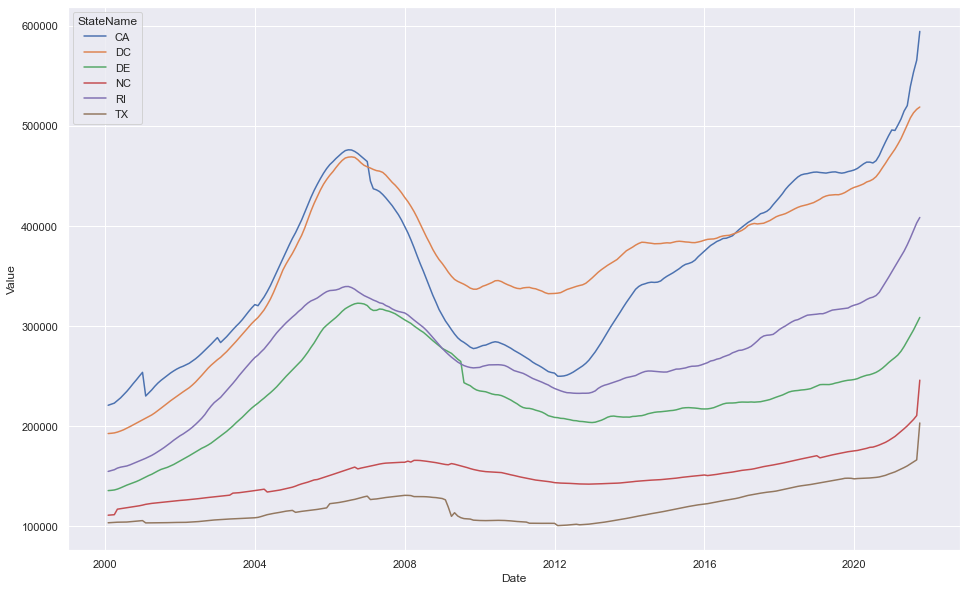

In [157]:
sns.lineplot(data=topBottomPlot, x="Date", y="Value", hue="StateName")

# Results and Insights

## The average home value in the U.S fluctuated quite a bit in the past 20 years. Started at 2000, the price increased steadily, and it started to drop around 2008 possibly due to economic crisis. Around 2012, the home value started to climb back up and reached pre-econonmic crisis value around 2020. There is a huge increasing spike at 2021.
## The states that have top three average home values are CA, DC, and RI. The states that have bottom three average home values are TX, NC, and DE.
## 2021 might be a good time to invest in real estate, however, a time-series predication is crucial for determining future home values.